<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Predict_score/17052021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> BÀI TẬP COLAB SỐ 03: DỰ ĐOÁN ĐIỂM CUỐI KỲ TẬP DỮ LIỆU WECODE (Ngày 17/5/2021) <center> <h> <b>

###**1. Nhóm thực hiện**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

In [2]:
# DOWLOAD WECODE.CSV AND SCORE_TRAIN.CSV
!gdown --id 1Oxicp0c_Z37N2OmZ7CxEQBepE7Wnz8Sc
!gdown --id 1eNiHRT4FMBDjCk9q3FCnd3oydgS1taOW

Downloading...
From: https://drive.google.com/uc?id=1Oxicp0c_Z37N2OmZ7CxEQBepE7Wnz8Sc
To: /content/score_training.csv
100% 23.9k/23.9k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eNiHRT4FMBDjCk9q3FCnd3oydgS1taOW
To: /content/wecode.csv
30.8MB [00:00, 144MB/s]


#**I. Tham khảo**

1. [Read specific column from CSV](https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python)
2. [pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
3. [Drop rows from the dataframe based on certain condition applied on a column](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/)
4. [Merge two csv files by specific column using Pandas](https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/)
5. [Find empty or NaN entry in Pandas Dataframe](https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe)
6. [Visualization data](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


#**II. Xử lý data**

##**1. Thư viện cần thiết**

In [1]:
# importing panda library
import pandas as pd
from pandas import DataFrame

#  importing Matplotlib’s Pyplot module
import matplotlib.pyplot as plt

# importing numpy library
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##**2. Xử lý file wecode.csv**

- Từ file wecode.csv nhóm quyết định lấy ra 5 cột là: **assignment_id,	problem_id,	user_id,	is_final,	pre_score**

In [3]:
#https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python
df = pd.read_csv('/content/wecode.csv', usecols = ['assignment_id','problem_id','user_id','is_final',	'pre_score'])
df.head(10)



,assignment_id,problem_id,user_id,is_final,pre_score
0,0,3,4,1,10000
1,0,4,4,1,10000
2,0,5,4,0,0
3,0,5,4,0,0
4,0,5,4,0,0
5,0,5,4,0,0
6,0,6,4,1,10000
7,0,7,4,1,10000
8,0,8,4,1,10000
9,0,9,4,1,10000


- Sau khi lấy ra 5 cột như trên. để dễ quan sát thì tụi em sort lại theo user_id từ bé đến lớn và sắp xếp lại các cột

In [4]:
# sorting dựa vào user_id
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

df_wecode = df.sort_values(
    by=["user_id", "assignment_id","problem_id", "is_final",	'pre_score']
    )[["user_id", "assignment_id","problem_id", "is_final",	'pre_score']]
print(df_wecode)


        user_id  assignment_id  problem_id  is_final  pre_score
13940         1              0          81         1          0
84860         1              0         370         1      10000
0             4              0           3         1      10000
1             4              0           4         1      10000
2             4              0           5         0          0
...         ...            ...         ...       ...        ...
233958     1868            273         586         0          0
234019     1868            273         586         1      10000
233965     1868            273         616         1      10000
233959     1868            273         619         1      10000
233961     1868            273         622         1      10000

[264606 rows x 5 columns]


- Sau khi sắp xếp xong, tụi em thực hiện đếm các giá trị. Mỗi giá trị đếm sẽ được thêm vào một bảng riêng và cuối cùng sẽ merge các bảng lại với nhau. Ở đây có 4 bảng là:
  1. ***total_problem:*** đếm số problem mà mỗi user_id đã làm
  2. ***total_submit:*** đếm số lần submit của mỗi user_id, tính cả lần submit đúng và sai (is_final = 0 hoặc 1)
  3. ***submit_final***: Đếm số lần mà user_id submit thành công (có điểm, is_final = 1).
  4. ***total_score***: tính tổng số điểm của mỗi user_id. Tổng các điểm > 0.

In [34]:
# Đếm số problem_id mà mỗi user_id đã làm 
total_problem = df_wecode.groupby('user_id')['problem_id'].count().reset_index(name='num_of_problem')

print(total_problem)

# Đếm số lần submit mà mỗi user_id đã làm 
total_submit = df_wecode[df_wecode['pre_score'] >= 0].groupby('user_id')['user_id'].count().reset_index(name='num_of_submit')

print(total_submit)

# Đếm số lần submit đúng (is_final = 1) mà mỗi user_id đã làm 
submit_final = df_wecode[df_wecode['is_final'] == 1].groupby('user_id')['is_final'].count().reset_index(name='submit_final')

print(submit_final)

# tổng số điểm > 0 mà mỗi user_id đã làm 
total_score = df_wecode[df_wecode['pre_score'] > 0].groupby('user_id')['pre_score'].sum().reset_index(name='total_score')

print(total_score)

      user_id  num_of_problem
0           1               2
1           4              54
2           5               6
3           6             130
4           7               5
...       ...             ...
1154     1860              76
1155     1862              12
1156     1864             187
1157     1865              99
1158     1868              47

[1159 rows x 2 columns]
      user_id  num_of_submit
0           1              2
1           4             54
2           5              6
3           6            130
4           7              5
...       ...            ...
1154     1860             76
1155     1862             12
1156     1864            187
1157     1865             99
1158     1868             47

[1159 rows x 2 columns]
      user_id  submit_final
0           1             2
1           4            38
2           5             5
3           6            88
4           7             2
...       ...           ...
1152     1860            48
1153     1862     

- merge tất cả các bảng trên thành một bảng duy nhất là **df_wecode**

In [45]:
#merge total_problem vs total_submit vs submit_final
#https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/

merge1 = pd.merge(total_problem, total_submit,
                   on='user_id', 
                   how='inner')
  
merge2 = pd.merge(merge1, submit_final,
                   on='user_id', 
                   how='inner')
merge_wecode = pd.merge(merge2, total_score,
                        on='user_id', 
                        how='inner')

# displaying result
print(merge_wecode)

      user_id  num_of_problem  num_of_submit  submit_final  total_score
0           1               2              2             2        10000
1           4              54             54            38       466000
2           5               6              6             5        30000
3           6             130            130            88       965637
4           7               5              5             2        18843
...       ...             ...            ...           ...          ...
1139     1860              76             76            48       405440
1140     1862              12             12             6        40000
1141     1864             187            187            63       563292
1142     1865              99             99            17       189460
1143     1868              47             47            27       390000

[1144 rows x 5 columns]


## **3. Xử lý file score_training.csv**

- file score_training.csv chỉ lấy 2 cột là **id** *(user_id trong wecode.csv)* và **CK**

In [36]:
df_score = pd.read_csv('/content/score_training.csv', usecols = ['id', 'CK'])

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
# đổi tên cột id thành user_id để đồng bộ với file wecoe.csv
df_score = df_score.rename(columns = {'id': 'user_id'})

print(df_score)

     user_id   CK
0         22  8.5
1         24  9.5
2         27   10
3         28  9.5
4         29  8.5
..       ...  ...
970     1857    4
971     1859  1.5
972     1862  7.5
973     1865  7.5
974     1866    5

[975 rows x 2 columns]


- Tiếp theo là merge 2 bảng là bảng **merge_wecode** và **df_score**. Ở đây dùng join left theo merge_wecode, bởi nhiều dữ liệu bên merge_wecode có nhưng bên df_score lại không và những cái thiếu bên df_score là những cái cần dự đoán.
- những dữ liệu thiếu bên cột CK sẽ thành NaN

In [62]:
#merge table "merge_wecode" (wecode.csv) vs table "df_score" (training_score.csv)
train_data = pd.merge(merge_wecode, df_score,
                   on='user_id', 
                   how='left')
  
# displaying result
print(train_data)
print(train_data.dtypes)

      user_id  num_of_problem  num_of_submit  submit_final  total_score   CK
0           1               2              2             2        10000  NaN
1           4              54             54            38       466000  NaN
2           5               6              6             5        30000  NaN
3           6             130            130            88       965637  NaN
4           7               5              5             2        18843  NaN
...       ...             ...            ...           ...          ...  ...
1139     1860              76             76            48       405440  NaN
1140     1862              12             12             6        40000  7.5
1141     1864             187            187            63       563292  NaN
1142     1865              99             99            17       189460  7.5
1143     1868              47             47            27       390000  NaN

[1144 rows x 6 columns]
user_id            int64
num_of_problem     int64
n

- Sau khi merge tất cả lại ta được bảng là **train_data**. Bước tiếp theo sẽ tính **ratio** *(tỷ lệ) được tính bằng:\
  *(submit_final / num_of_submit) . total_score*

In [63]:
#chuyển CK từ object->float64. do dữ liệu lúc đầu cột CK là object
train_data["CK"] = pd.to_numeric(train_data['CK'], errors='coerce')

#Thêm cột ratio và tính toán giá trị cột
train_data['ratio'] = (train_data['submit_final']/train_data['num_of_submit'])*train_data['total_score']

print(train_data)


      user_id  num_of_problem  num_of_submit  ...  total_score   CK          ratio
0           1               2              2  ...        10000  NaN   10000.000000
1           4              54             54  ...       466000  NaN  327925.925926
2           5               6              6  ...        30000  NaN   25000.000000
3           6             130            130  ...       965637  NaN  653661.969231
4           7               5              5  ...        18843  NaN    7537.200000
...       ...             ...            ...  ...          ...  ...            ...
1139     1860              76             76  ...       405440  NaN  256067.368421
1140     1862              12             12  ...        40000  7.5   20000.000000
1141     1864             187            187  ...       563292  NaN  189772.171123
1142     1865              99             99  ...       189460  7.5   32533.535354
1143     1868              47             47  ...       390000  NaN  224042.553191

[11

- Để cột CK là dự đoán cần tách những hàng có giá trị CK là NaN ra để làm test dự đoán.
- Sau khi tách thì xóa những hàng có CK NaN ra train_data để thực hiện dự đoán model.

In [64]:
#Tách nhữn user_id có chưa có điểm CK ra
#Đây là bảng dùng dự đoán điểm CK còn thiếu
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe

miss_CK = train_data[train_data['CK'].isna()]

print(miss_CK)


      user_id  num_of_problem  num_of_submit  ...  total_score  CK          ratio
0           1               2              2  ...        10000 NaN   10000.000000
1           4              54             54  ...       466000 NaN  327925.925926
2           5               6              6  ...        30000 NaN   25000.000000
3           6             130            130  ...       965637 NaN  653661.969231
4           7               5              5  ...        18843 NaN    7537.200000
...       ...             ...            ...  ...          ...  ..            ...
1134     1852              20             20  ...        50000 NaN    2500.000000
1135     1855             134            134  ...       875665 NaN  437832.500000
1139     1860              76             76  ...       405440 NaN  256067.368421
1141     1864             187            187  ...       563292 NaN  189772.171123
1143     1868              47             47  ...       390000 NaN  224042.553191

[346 rows x 7 c

In [66]:
#Xóa những hàng có CK là NaN khỏi train_data
train_data.dropna(subset = ['CK'], inplace=True)

print(train_data)

      user_id  num_of_problem  num_of_submit  ...  total_score    CK          ratio
9          24             164            164  ...      1031674   9.5  484383.524390
10         27              13             13  ...        52000  10.0   20000.000000
11         29             199            199  ...      1225828   8.5  492795.175879
13         34             218            218  ...      1206981   6.5  465075.247706
14         35             297            297  ...      1809718   4.5  920092.316498
...       ...             ...            ...  ...          ...   ...            ...
1136     1856              64             64  ...       329074   7.5  159395.218750
1137     1857              55             55  ...       389000   4.0  282909.090909
1138     1859              31             31  ...        39000   1.5   37741.935484
1140     1862              12             12  ...        40000   7.5   20000.000000
1142     1865              99             99  ...       189460   7.5   32533

##**4. Trực quan dữ liệu**


[Text(0, 0.5, 'CK'), Text(0.5, 0, 'ratio')]

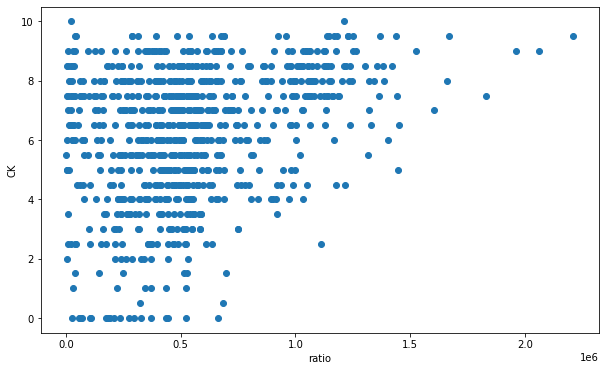

In [67]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(train_data['ratio'], train_data['CK'])
axs.set(xlabel = 'ratio', ylabel= 'CK')

#**III. Train model**

- Dùng linear Regression

Mean squared error:  3.5205682965739826


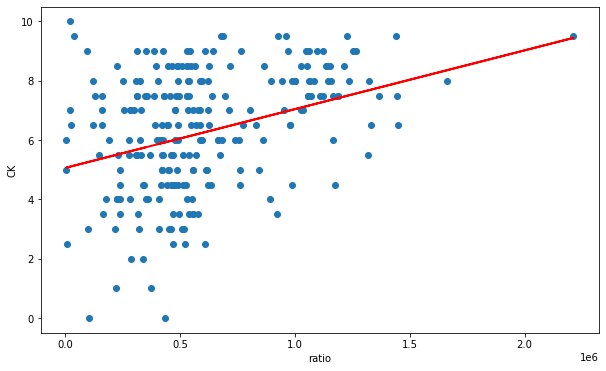

In [79]:
X = np.array(train_data['ratio']).reshape(-1,1)
Y = np.array(train_data['CK'])

# Create linear regression object
lr = linear_model.LinearRegression()

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lr.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = lr.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

- Dùng Lasso Regression

Mean squared error:  3.520568597832552


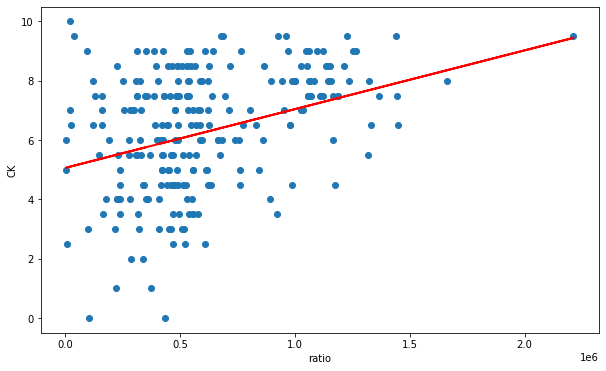

In [77]:
X = np.array(train_data['ratio']).reshape(-1,1)
Y = np.array(train_data['CK'])

# Create lasso regression object
lasso_reg = linear_model.Lasso(alpha=0.1)

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lasso_reg.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = lasso_reg.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

- Dùng Ridge Regression

Mean squared error:  3.5205682463648675


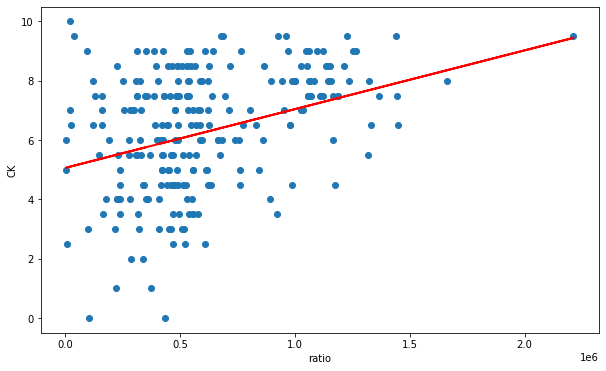

In [83]:
X = np.array(train_data['ratio']).reshape(-1,1)
Y = np.array(train_data['CK'])

# Create ridge regression object
ridge_reg = linear_model.Ridge(alpha=0.5)

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
ridge_reg.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = ridge_reg.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

---------------------------
**Nháp**